##Nombre: Jose Luis Soto Soto. Codigo: 2181583.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import scipy.stats as stats
from scipy.linalg import hilbert
import random as rd
from sklearn.datasets import make_spd_matrix

#Primer punto:


Definimos funciones

In [ ]:
def f(x):
  return 0.5 * x.T@A@x - b.T@x

def grad_f(x):
  return A@x-b

def H_f(x):
  return A

In [ ]:
def conjugate_gradient(x, p_k, r_k, A, b, e=1e-6):
  error = np.linalg.norm(r_k, 2)
  errors = [error]
  k = 0
  while (error > e):
    d = p_k.T@A@p_k
    alpha = -(r_k.T@p_k)/d
    x = x + alpha*p_k 
    r_k = A@x - b
    b_k = (r_k.T@A@p_k)/d
    p_k = -r_k + b_k*p_k
    k = k + 1
    error = np.linalg.norm(r_k, 2)
    errors.append(error)
  
  return x, k, errors


In [ ]:
all_iters = []
for n in range(5,11,1):
  b = np.ones(n)
  A = hilbert(n)
  x_0 = np.zeros(n)
  r_0 = A@x_0 - b
  g = grad_f(x_0)
  p_0 = -g
  answer_x, iters, errors = conjugate_gradient(x_0,p_0,r_0,A,b)
  all_iters.append(iters)
  print("Para n: "+str(n)+"   Iterations: " + str(iters))

Para n: 5   Iterations: 6
Para n: 6   Iterations: 9
Para n: 7   Iterations: 12
Para n: 8   Iterations: 24
Para n: 9   Iterations: 52
Para n: 10   Iterations: 832


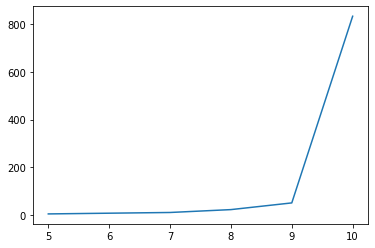

In [ ]:
plt.plot(range(5,11,1),all_iters)

Como podemos observar, al usar el metodo de conjugate gradient con una matriz de Hilbert $A$ y un vector de unos $b$, las iteraciones se mantienen en un numero considerablemente pequeño para $n<10$. Por lo cual se podria llegar hasta especular el crecimiento exponencial del numero de iteraciones junto con la dimensionalidad de $A$

#Segundo Punto

In [ ]:
def f(x):
  return 0.5 * x.T@A@x - b.T@x

def grad_f(x):
  return A@x-b

def H_f(x):
  return A

In [ ]:
def step_size(x_k,p_k,c1,c2):
  step = 1
  while f(x_k + step*p_k) > f(x_k) + c1*step*np.dot(grad_f(x_k),p_k):
    step = c2*step
    
  return step


In [ ]:
def steepest_desc(x_0,e=1e-6,c1=1e-4,c2=0.95):
  x_k = x_0
  step_vals = []
  iter=0
  e_actual = 100

  while (e_actual>e):
    #p_k = - (1/np.linalg.norm(grad_f(x_k)))*grad_f(x_k)
    p_k = - grad_f(x_k)
    step = step_size(x_k, p_k, c1, c2)   
    step_vals.append(step)
    x_k_1 = x_k + step*p_k
    e_actual = np.linalg.norm(grad_f(x_k))
    x_k = x_k_1
    iter = iter + 1

  return x_k, step_vals, iter

In [ ]:
def newton(x_0,e=1e-6,c1=1e-4,c2=0.95):
  x_k = x_0
  step_vals = []
  iter = 0
  e_actual=100

  while (e<e_actual):
    p_k = - (np.linalg.inv(H_f(x_k)))@grad_f(x_k)    
    step = step_size(x_k, p_k, c1, c2)
    step_vals.append(step)    
    x_k_1 = x_k + step*p_k
    e_actual = np.linalg.norm(grad_f(x_k))
    x_k = x_k_1
    iter = iter + 1

  return x_k, step_vals, iter

In [ ]:
iters_conjugate = []
iters_steepest = []
iters_newton = []

for n in range(2,11,1):
  b = np.ones(n)
  A = make_spd_matrix(n) #Genera una matriz simetrica positiva y definida aleatoria

  x_0 = np.zeros(n)
  r_0 = A@x_0 - b
  g = grad_f(x_0)
  p_0 = -g

  x_conjugate, iter_conjg, errors = conjugate_gradient(x_0,p_0,r_0,A,b)
  x_steepest, step_vals ,iter_steep = steepest_desc(x_0)
  x_newton, step_vals ,iter_newton = newton(x_0)

  iters_conjugate.append(iter_conjg)
  iters_steepest.append(iter_steep)
  iters_newton.append(iter_newton)

  print("Para n = "+str(n))
  print("Iter Steepest: "+str(iter_steep) )
  print("Iter Conjugate: "+str(iter_conjg) )
  print("Iter Newton: "+str(iter_newton))
  print("--------------------------")

Para n = 2
Iter Steepest: 723
Iter Conjugate: 2
Iter Newton: 2
--------------------------
Para n = 3
Iter Steepest: 156
Iter Conjugate: 3
Iter Newton: 2
--------------------------
Para n = 4
Iter Steepest: 2619
Iter Conjugate: 4
Iter Newton: 2
--------------------------
Para n = 5
Iter Steepest: 174
Iter Conjugate: 5
Iter Newton: 2
--------------------------
Para n = 6
Iter Steepest: 203
Iter Conjugate: 6
Iter Newton: 2
--------------------------
Para n = 7
Iter Steepest: 1737
Iter Conjugate: 7
Iter Newton: 2
--------------------------
Para n = 8
Iter Steepest: 1555
Iter Conjugate: 9
Iter Newton: 2
--------------------------
Para n = 9
Iter Steepest: 575
Iter Conjugate: 10
Iter Newton: 2
--------------------------
Para n = 10
Iter Steepest: 442
Iter Conjugate: 11
Iter Newton: 2
--------------------------


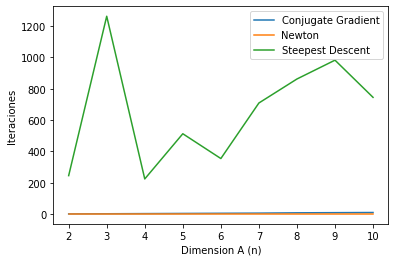

In [ ]:
n = range(2,11,1)

plt.plot(n, iters_conjugate, label = "Conjugate Gradient")
plt.plot(n, iters_newton, label = "Newton")
plt.plot(n, iters_steepest, label = "Steepest Descent")
plt.xlabel('Dimension A (n)')
plt.ylabel('Iteraciones')
plt.legend()
plt.show()

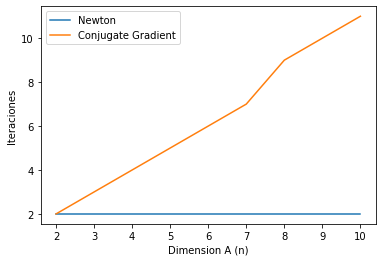

In [ ]:
n = range(2,11,1)
plt.plot(n, iters_newton, label = "Newton")
plt.plot(n, iters_conjugate, label = "Conjugate Gradient")
plt.xlabel('Dimension A (n)')
plt.ylabel('Iteraciones')
plt.legend()
plt.show()

Como podemos observar, los metodos de mayor rendimiento para el problema tratado son el metodo de Newton y el de Conjugate Gradient, recordando que  $A$ debe ser una matriz simetrica, positiva y definida. Destacandose a su vez mas el metodo de newton, que a lo largo del cambio de la dimensionalidad de $A$ mantiene  un numero de iteraciones constante y por tanto, se concluye que para el caso en especifico viene a ser el mas eficiente.

In [ ]:
iters_conjugate = []
n = 4
b = np.ones(n)
A = make_spd_matrix(n) #Genera una matriz simetrica positiva y definida aleatoria


for _ in range(1,200,1):
  x_0 = np.random.random(n) #Se genera un punto inicial aleatorio
  r_0 = A@x_0 - b
  g = grad_f(x_0)
  p_0 = -g
  x_conjugate, iter_conjg, errors = conjugate_gradient(x_0,p_0,r_0,A,b)
  iters_conjugate.append(iter_conjg)

##Numero de iteraciones Conjugate Gradient

In [ ]:
plt.hist(iters_conjugate, bins = 30)

(array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0., 199.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]),
 array([3.5       , 3.53333333, 3.56666667, 3.6       , 3.63333333,
        3.66666667, 3.7       , 3.73333333, 3.76666667, 3.8       ,
        3.83333333, 3.86666667, 3.9       , 3.93333333, 3.96666667,
        4.        , 4.03333333, 4.06666667, 4.1       , 4.13333333,
        4.16666667, 4.2       , 4.23333333, 4.26666667, 4.3       ,
        4.33333333, 4.36666667, 4.4       , 4.43333333, 4.46666667,
        4.5       ]),
 <a list of 30 Patch objects>)

In [ ]:
iters_newton = []
n = 4
b = np.ones(n)
A = make_spd_matrix(n) #Genera una matriz simetrica positiva y definida aleatoria


for _ in range(1,200,1):
  x_0 = np.random.random(n) #Se genera un punto inicial aleatorio
  x_conjugate, step_vals, iter_newton = newton(x_0)
  iters_newton .append(iter_newton)

##Numero de iteraciones Newton

(array([  0.,   0.,   0.,   0.,   0., 199.,   0.,   0.,   0.,   0.]),
 array([1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5]),
 <a list of 10 Patch objects>)

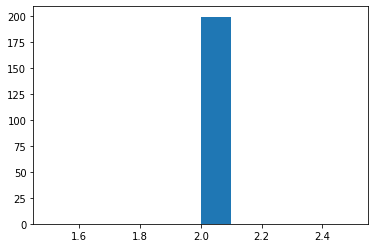

In [ ]:
plt.hist(iters_newton)

In [ ]:
iters_steepest = []
n = 4
b = np.ones(n)
A = make_spd_matrix(n) #Genera una matriz simetrica positiva y definida aleatoria

for _ in range(1,200,1):
  x_0 = np.random.random(n) #Se genera un punto inicial aleatorio
  x_conjugate, step_vals, iter_steepest = steepest_desc(x_0)
  iters_steepest.append(iter_steepest)

In [ ]:
plt.hist(iters_steepest)

(array([ 1.,  0.,  5., 17., 47., 55., 41., 21.,  7.,  5.]),
 array([334., 336., 338., 340., 342., 344., 346., 348., 350., 352., 354.]),
 <a list of 10 Patch objects>)

Los previos histogramas terminan de verificar, las iniciales sospechas de que newton y conjugate gradient son los 2 mejores algoritmos para mantener un numero de iteraciones cte, inclusive cambiande  $x_0$